In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append("../")
from spaceUtils import *

In [ ]:
%cd drive/My\Drive/LELSD/notebooks

/content/drive/MyDrive/LELSD/notebooks


In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
rep = '../logs/'

Loading scores computed across models

In [ ]:
scoreS2 = np.load(rep+'channelRankS2/scoreL4.npy')
score3R = np.load(rep+'channelRankS3M/scoreL3.npy')
score3T = np.load(rep+'channelRankS3TM/scoreL6.npy')

Here we show the two of the features we focused on during this project: Hair and Nose. 
The choice of layers were so that we obtain same resolution of the feature maps across models. The optimal channels for the semantic were then computed from there using iou metric. (different from the actual best channels which are ranked by counting metric)

### NOSE SEMANTICS

In [ ]:
# computing intersection over union of specific semantics
nose2  = (scoreS2[:,:,:,0]/scoreS2[:,:,:,1])[:,:,part_to_mask_idx['nose']]
nose3R = (score3R[:,:,:,0]/score3R[:,:,:,1])[:,:,merged_mask_idx['nose']]
nose3T = (score3T[:,:,:,0]/score3T[:,:,:,1])[:,:,merged_mask_idx['nose']]
n2c  = np.argmax(np.nanmean(nose2,axis=0))
n3rc = np.argmax(np.nanmean(nose3R,axis=0))
n3tc = np.argmax(np.nanmean(nose3T,axis=0))

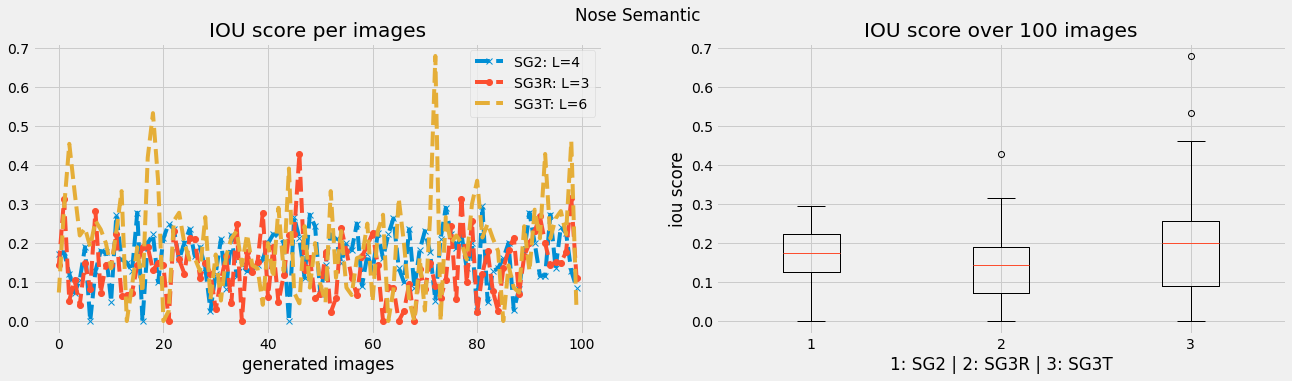

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

channelStrength1 = nose2[:,n2c]
channelStrength2 = nose3R[:,n3rc]
channelStrength3 = nose3T[:,n3tc]
ax[0].plot(channelStrength1, '--x',label='SG2: L=4')
ax[0].plot(channelStrength2, '--o',label='SG3R: L=3')
ax[0].plot(channelStrength3, '--', label='SG3T: L=6')
ax[0].set_xlabel('generated images')
ax[1].set_xlabel('1: SG2 | 2: SG3R | 3: SG3T')
ax[1].set_ylabel('iou score')

ax[1].boxplot([channelStrength1, channelStrength2, channelStrength3])


ax[0].legend()
ax[0].set_title('IOU score per images')
ax[1].set_title('IOU score over 100 images')
plt.suptitle('Nose Semantic')
plt.show()

### HAIR SEMANTICS

In [ ]:
hair2  = (scoreS2[:,:,:,0]/scoreS2[:,:,:,1])[:,:,part_to_mask_idx['hair']]
hair3R = (score3R[:,:,:,0]/score3R[:,:,:,1])[:,:,merged_mask_idx['hair']]
hair3T = (score3T[:,:,:,0]/score3T[:,:,:,1])[:,:,merged_mask_idx['hair']]
h2c  = np.argmax(np.nanmean(hair2,axis=0))
h3rc = np.argmax(np.nanmean(hair3R,axis=0))
h3tc = np.argmax(np.nanmean(hair3T,axis=0))

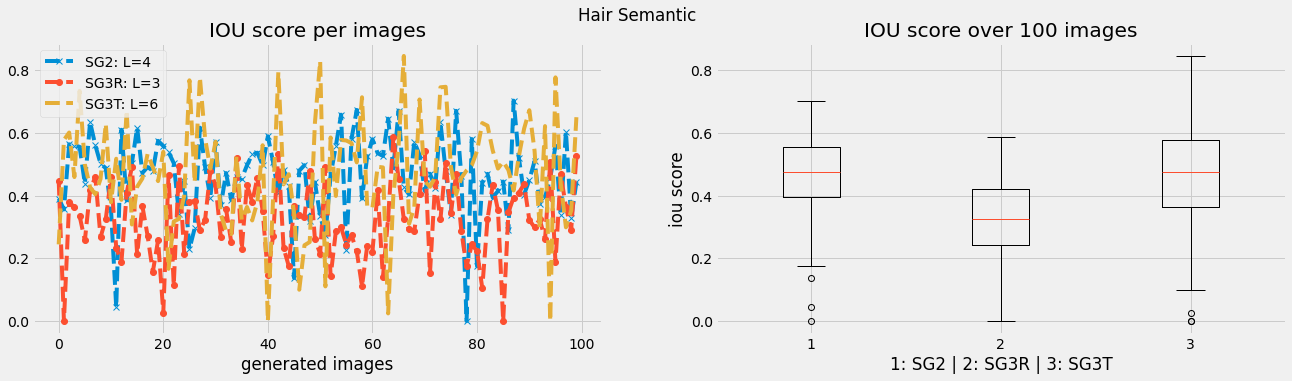

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

channelStrength1 = hair2[:,h2c]
channelStrength2 = hair3R[:,h3rc]
channelStrength3 = hair3T[:,h3tc]
ax[0].plot(channelStrength1, '--x',label='SG2: L=4')
ax[0].plot(channelStrength2, '--o',label='SG3R: L=3')
ax[0].plot(channelStrength3, '--', label='SG3T: L=6')
ax[0].set_xlabel('generated images')
ax[1].set_xlabel('1: SG2 | 2: SG3R | 3: SG3T')
ax[1].set_ylabel('iou score')

ax[1].boxplot([channelStrength1, channelStrength2, channelStrength3])

ax[0].legend()
ax[0].set_title('IOU score per images')
ax[1].set_title('IOU score over 100 images')
plt.suptitle('Hair Semantic')
plt.show()

### Remark from the IOU plotted: 
- For either semantics we see a trend of having both SG2 and SG3T with higher iou scores in general compared to SG3R. 
- And therefore in this layer level, there seem to be better channels for the two semantics we work with in SG2 and SG3T
- This motivates us to try editing with SG3T found channels
